In [1]:
# this is needed for the plotting questions.
# if this fails, you may need to run jupyter
# with administrator privileges
import sys
!{sys.executable} -m pip install plotchecker

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/


You should consider upgrading via the 'D:\ApplicationApps\Python\python.exe -m pip install --upgrade pip' command.


In [2]:
from autograder_term2week2 import *
_globals = globals()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Autograder loaded successfully!
Remember to always restart and run all from the Kernel menu before submitting!


# <center> Introduction to Mathematical Computing </center>
### <center>Phil Ramsden, Boumediene Hamzi, Sam Brzezicki</center>

# <center> Worksheet 7: Yet More About Functions, and numpy</center>

**NOTE:** When answering a question, remember to remove the `raise NotImplementedError()` line.

## Question 0: don't miss this bit!

In the file called `my_username.txt`, type your <b>short-form College user name</b> (this will usually be one or more letters followed by three or more figures, such as qk4019). Don't use quote marks. Then save the file.

In [3]:
# 5 Marks
# Do not try to delete this cell
# Run this cell for grading of Question 0
_globals = globals()
question0(_globals)

You've changed the contents of the file; thank you!
Your username has been recognised; thank you!

5 out of 5 marks


5

## Question 1

(a) Write and test a function called <code>pop_min</code> that takes as its argument a non-empty list <code>num_list</code>, assumed to consist of ints and/or floats, and outputs its minimum value. However, your function should have the side-effect of removing this minimum value from <code>num_list</code>. 

Test your function. If you type

```python
this_list = [3, 5, 2, 7, 1, 2, 3, 1, 9]
pop_min(this_list)
```

then you should get the output 1, and as a side-effect, the value of <code>this_list</code> should become

<code>[3, 5, 2, 7, 2, 3, 1, 9]</code>.

In [111]:
def pop_min(num_list):
    idx = 0
    if not num_list:
        return []
    minimum = num_list[0]
    for i in range(len(num_list)):
        if num_list[i] < minimum:
            minimum = num_list[i]
    while idx < len(num_list):
        if num_list[idx] == minimum:
            num_list.pop(idx)
            return minimum
        else: idx = idx + 1

    return minimum

In [112]:
# Function testing; not for marks
this_list = [3, 5, 2, 7, 1, 2, 3, 1, 9]
this_min = pop_min(this_list)
print(this_min)
try:
    assert(this_min == 1)
    assert(this_list == [3, 5, 2, 7, 2, 3, 1, 9])
    print('Test passed!')
except:
    print('Test failed!')

1
Test passed!


In [6]:
# 2 Marks
# Do not try to delete this cell
# Run this cell for grading
_globals = globals()
question1a(_globals)

Testing: typical case
Test passed!

Testing: edge case
Test passed!

2 out of 2


2

(b) Write and test a function called <code>simple_sort</code> that takes as its argument a list <code>num_list</code>, assumed to be numerical, and, by using <code>pop_min</code>, returns all the elements of <code>num_list</code>, in ascending order. 

In [ ]:
def simple_sort(num_list):
    sorted_list = []
    for i in range(len(num_list)):
        sorted_list.append(pop_min(num_list))
    return sorted_list
print(simple_sort([6,8,3,9,2,0,3,0,1,2,1]))

In [8]:
# 2 Marks
# Do not try to delete this cell
# Run this cell for grading
_globals = globals()
question1b(_globals)

Testing: typical case
Test passed!

Testing: edge case
Test passed!

2 out of 2


2

(c) Amend it so that instead of returning the sorted list, it has the <b>side-effect</b> of making the original list <em>equal</em> to the sorted list. So that if you type 

```python
this_list = [3, 5, 2, 7, 1, 2, 3, 1, 9]
simple_sort(this_list)
```

then you should get no output (strictly speaking, you get the output `None`, but this isn't visible), and as a side-effect, the value of <code>this_list</code> should become

<code>[1, 1, 2, 2, 3, 3, 5, 7, 9]</code>.

In [115]:
def simple_sort(num_list) -> None:
    sorted_list = []
    for i in range(len(num_list)):
        sorted_list.append(pop_min(num_list))
    num_list += sorted_list


In [116]:
# 2 Marks
# Do not try to delete this cell
# Run this cell for grading
_globals = globals()
question1c(_globals)

Testing: typical case
No value has been returned; this is correct
List sorted correctly in place

Testing: edge case
Sorted list returned correctly
No value has been returned; this is correct

2 out of 2


2

(d) Adapt your <code>pop_min</code> function so that every time one element is compared with another, it increments by one a global variable called <code>comparison_count</code>. Hence if you type

```python
comparison_count = 0    
pm = pop_min([3, 5, 2, 7, 1, 2, 3, 1, 9])
comparison_count
```

you should get 9.

Using this, calculate the total number of comparisons necessary to sort the list <code>[3, 5, 2, 7, 1, 2, 3, 1, 9]</code> using <code>simple_sort</code>. 

Do you think this is an efficient method of sorting?

In [125]:
def pop_min(num_list):
    global comparison_count
    idx = 0
    minimum = num_list[0]
    for i in range(1, len(num_list)):
        # each loop will compare minimum to num_list[i], don't put it in the branch
        comparison_count = comparison_count + 1
        if num_list[i] < minimum:

            if num_list[i] < minimum:
                idx = i
                minimum = num_list[i]

    return num_list.pop(idx)


In [126]:
# 2 Marks
# Do not try to delete this cell
# Run this cell for grading
#
_globals = globals()
comparison_count = 0

question1d(_globals)

Testing: typical case
No value has been returned; this is correct
List sorted correctly in place
Correct comparison count

Testing: edge case
No value has been returned; this is correct
List sorted correctly in place
Correct comparison count

2 out of 2


2

## Question 2

(i) Import the NumPy module, and then define three lists and three arrays as follows:

In [13]:
int_list = [1, 2, 3]
float_list = [4.0, 5.0, 6.0]
int_float_list = [7, 8, 9.0]
int_list2 = [10, 11, 12]

int_arr = np.array(int_list)
float_arr = np.array(float_list)
int_float_arr = np.array(int_float_list)
int_arr2 = np.array(int_list2)

Print each of your four arrays, and extract elements of them using, for example
```python
int_arr[0]
```

Then:

(a) Complete the following statement:

A NumPy array based on a list of ints contains 

<ol>
    <li>only ints of some kind;</li>
    <li>only floats of some kind;</li>
    <li>both ints and floats.</li>
</ol>

In [14]:
question2ia_answer = 1

In [15]:
# 1 Mark
assert(question2ia_answer == question2_ia())
print('test case passed!')

test case passed!


(b) Complete the following statement: 

A NumPy array based on a list of floats contains 

<ol>
    <li>only ints of some kind;</li>
    <li>only floats of some kind;</li>
    <li>both ints and floats.</li>
</ol>

In [16]:
question2ib_answer = 2

In [17]:
# 1 Mark
assert(question2ib_answer == question2_ib())
print('test case passed!')

test case passed!


(c) Complete the following statement: 

A NumPy array based on a list of ints and floats contains 

<ol>
    <li>only ints of some kind;</li>
    <li>only floats of some kind;</li>
    <li>both ints and floats.</li>
</ol>

In [18]:
question2ic_answer = 2

In [19]:
# 1 Mark
assert(question2ic_answer == question2_ic())
print('test case passed!')

test case passed!


(d) Execute the following code:

In [20]:
print(type(1))
print(type(int_arr[0]))
print(type(7.0))
print(type(int_float_arr[0]))

<class 'int'>
<class 'numpy.int32'>
<class 'float'>
<class 'numpy.float64'>


Which of the following statements is true?

<ol>
    <li>Default NumPy ints and floats are each of the same type as default native Python ints and floats.</li>
    <li>Default NumPy ints are of the same type as default native Python ints, but the same is not true of floats.</li>
    <li>Default NumPy floats are of the same type as default native Python floats, but the same is not true of ints.</li>
    <li>Default NumPy ints and floats are each of a different type from default native Python ints and floats.</li>.
</ol>

In [21]:
question2id_answer = 4

In [22]:
# 1 Mark
assert(question2id_answer == question2_id())
print('test case passed!')

test case passed!


(ii) Define the following arrays:

In [23]:
int_float_complex_arr = np.array([1, 2.0, 3+0j])
int_float_complex_string_arr = np.array([1, 2.0, 3+0j, 'four'])

(a) Complete the following statement:

A NumPy array based on a list of ints, floats and complexes contains 

<ol>
    <li>only ints of some kind;</li>
    <li>only floats of some kind;</li>
    <li>only complexes of some kind;</li>
    <li>a mixture of ints, floats and complexes.</li>
</ol>

In [24]:
question2iia_answer = 3

In [25]:
# 1 Mark
assert(question2iia_answer == question2_iia())
print('test case passed!')

test case passed!


(b) Complete the following statement:

A NumPy array based on a list of ints, floats, complexes and strings contains 

<ol>
    <li>only ints of some kind;</li>
    <li>only floats of some kind;</li>
    <li>only complexes of some kind;</li>
    <li>only strings of some kind;</li>
    <li>a mixture of ints, floats, complexes and strings.</li>
</ol>

In [26]:
question2iib_answer = 4

In [27]:
# 1 Mark
assert(question2iib_answer == question2_iib())
print('test case passed!')

test case passed!


(c) Execute the following code:

In [28]:
print(type(1+0j))
print(type(int_float_complex_arr[0]))
print(type('1'))
print(type(int_float_complex_string_arr[0]))

<class 'complex'>
<class 'numpy.complex128'>
<class 'str'>
<class 'numpy.str_'>


Which of the following statements is true?

<ol>
    <li>Default NumPy complexes and strings are each of the same type as default native Python complexes and strings.</li>
    <li>Default NumPy complexes are of the same type as default native Python complexes, but the same is not true of strings.</li>
    <li>Default NumPy strings are of the same type as default native Python strings, but the same is not true of complexes.</li>
    <li>Default NumPy complexes and strings are each of a different type from default native Python complexes and strings.</li>.
</ol>

In [29]:
question2iic_answer = 4

In [30]:
# 1 Mark
assert(question2iic_answer == question2_iic())
print('test case passed!')

test case passed!


## Question 3

(i) Calculate
```python
int_arr + float_arr
```
and similar "array sums". Then:

(a) Complete the following statement:

When you add two NumPy arrays together, you

<ol>
    <li>concatenate them (that is, join them head to tail, in the same way as lists or tuples);</li>
    <li>add them component-by-component, as if they were vectors.</li>
</ol>

In [31]:
question3ia_answer = 2

In [32]:
# 1 Mark
assert(question3ia_answer == question3_ia())
print('test case passed!')

test case passed!


(b) Complete the following statement:

The sum of an array of ints and an array of floats is

<ol>
    <li>an array of ints;</li>
    <li>an array of floats;</li>
    <li>an array containing both ints and floats.</li>
</ol>

In [33]:
question3ib_answer = 2

In [34]:
# 1 Mark
assert(question3ib_answer == question3_ib())
print('test case passed!')

test case passed!


(c) Complete the following statement:

When you add two one-dimensional NumPy arrays of different lengths,

<ol>
    <li>it works fine;</li>
    <li>it generates an error message.</li>
</ol>

In [35]:
question3ic_answer = 2

In [36]:
# 1 Mark
assert(question3ic_answer == question3_ic())
print('test case passed!')

test case passed!


(ii) Experiment with using the other arithmetic operators, ```-```, ```*```, ```/```, ```//``` and ```**``` on scalars and 1D NumPy arrays. Then:

(a) Complete the following statement:

When you multiply a one-dimensional NumPy array by 3, you

<ol>
    <li>create three copies of the array, joined head to tail, as with lists or tuples;</li>
    <li>multiply each of the elements of the array separately by 3;</li>
    <li>multiply only the first element (that is, the element with index 0) by 3;</li>
    <li>none of the above: there's an error message.</li>
</ol>

In [37]:
question3iia_answer = 2

In [38]:
# 1 Mark
assert(question3iia_answer == question3_iia())
print('test case passed!')

test case passed!


(b) In which of the following circumstances can you use Python's arithmetic operators?

I. To combine a scalar with a scalar.<br/>
II. To combine a scalar with a 1D NumPy array of any length.<br/>
III. To combine two 1D NumPy arrays of the same length.<br/>
IV. To combine two 1D NumPy arrays of different lengths.

<ol>
    <li>All of them.</li>
    <li>All of them except II.</li>
    <li>All of them except IV.</li>
    <li>All of them except II and IV.</li>
</ol>

In [39]:
question3iib_answer = 3

In [40]:
# 1 Mark
assert(question3iib_answer == question3_iib())
print('test case passed!')

test case passed!


(iii) Create the 2D NumPy arrays

In [41]:
mat33 = np.array([[1,2,-1],[3,-4,0],[2,-1,1]])
mat13 = np.array([[1,2,3]])
mat31 = np.array([[1],[2],[3]])
mat23 = np.array([[1,3,5],[1,2,4]])

Experiment, and consider the following claims:

(a) When a $3\times 3$ NumPy array is added to a $1 \times 3$ NumPy array:

<ol>
    <li>an error is generated;</li>
    <li>it works, and the $1 \times 3$ array is treated as if it were three repeated rows;</li>
    <li>it works, and the $1 \times 3$ array is treated as if it were three repeated columns.</li>
</ol>

In [42]:
question3iiia_answer = 2

In [43]:
# 1 Mark
assert(question3iiia_answer == question3_iiia())
print('test case passed!')

test case passed!


(b) When a $3\times 3$ NumPy array is added to a $3 \times 1$ NumPy array:

<ol>
    <li>an error is generated;</li>
    <li>it works, and the $3 \times 1$ array is treated as if it were three repeated rows;</li>
    <li>it works, and the $3 \times 1$ array is treated as if it were three repeated columns.</li>
</ol>

In [44]:
question3iiib_answer = 3

In [45]:
# 1 Mark
assert(question3iiib_answer == question3_iiib())
print('test case passed!')

test case passed!


(c) When a $3\times 3$ NumPy array is added to a $2 \times 3$ NumPy array:

<ol>
    <li>an error is generated;</li>
    <li>it works, with rows being repeated cyclically as necessary;</li>
    <li>it works, with columns being repeated cyclically as necessary;</li>
</ol>

In [46]:
question3iiic_answer = 1

In [47]:
# 1 Mark
assert(question3iiic_answer == question3_iiic())
print('test case passed!')

test case passed!


(d) When a $3\times 3$ NumPy array is added to a 1D array of length 3:

<ol>
    <li>an error is generated;</li>
    <li>it works, and you get the same result as if the 1D array were a $1 \times 3$ array;</li>
    <li>it works, and you get the same result as if the 1D array were a $3 \times 1$ array.</li>
</ol>

In [48]:
question3iiid_answer = 2

In [49]:
# 1 Mark
assert(question3iiid_answer == question3_iiid())
print('test case passed!')

test case passed!


(iv) Experiment with commands like
```python
mat33 == mat33
mat31 < mat33
mat33 >= int_arr
mat23 > mat33
```
and so on.

Then:

(a) Comparing two identical NumPy arrays using ```==```:

<ol>
    <li>creates the output <code>True</code>, just as if we were comparing lists or tuples;</li>
    <li>creates an array with the same number of rows and columns, every entry of which is <code>True</code>;</li>
    <li>generates an error message.</li>
</ol>

In [50]:
question3iva_answer = 2

In [51]:
# 1 Mark
assert(question3iva_answer == question3_iva())
print('test case passed!')

test case passed!


(b) True or False: two numerical NumPy arrays can be compared using ```==```, ```<```, ```>```, ```<=``` or ```>=``` if and only if they can be combined using ```+```, ```-```, ```*```, ```/```, ```//``` or ```**```.

In [52]:
question3ivb_answer = True

In [53]:
# 1 Mark
assert(question3ivb_answer == question3_ivb())
print('test case passed!')

test case passed!


## Question 4

(a) Complete the following statement. Once NumPy has been imported as `np`, the values of
```python
np.linspace(7, 101, 95)
```
and
```python
np.arange(7, 102, 1)
```
are

<ol>
    <li>identical in every respect;</li>
    <li>equal (in all components), but not quite identical;</li>
    <li>neither equal nor identical.</li>
</ol>

In [54]:
question4a_answer = 2

In [55]:
# 1 Mark
assert(question4a_answer == question4_a())
print('test case passed!')

test case passed!


(b) Complete the following statement. Once NumPy has been imported as `np`, the values of
```python
np.sqrt(np.linspace(7, 101, 95))
```
and
```python
np.sqrt(np.arange(7, 102, 1))
```
are

<ol>
    <li>identical in every respect;</li>
    <li>equal (in all components), but not quite identical;</li>
    <li>neither equal nor identical.</li>
</ol>

In [56]:
question4b_answer = 1# (delete, and fill in the value 1, 2 or 3)
# YOUR CODE HERE


In [57]:
# 1 Mark
assert(question4b_answer == question4_b())
print('test case passed!')

test case passed!


(c) Using either `linspace` or `arange`, create a 1D NumPy array called `theta_array` consisting of 401 equally-spaced values between $0$ and $2\,\pi$.

Then create another 1D NumPy array called `x_array` consisting of $\cos(3\,\theta)$ for each $\theta$ in `theta_array` (you shouldn't need to use a loop or a comprehension for this, though autograding won't be able to tell if you have).

Create, too, a 1D NumPy array called `y_array` consisting of $\sin(5\,\theta)$ for each $\theta$ in `theta_array`.

Finally, create a plot of `x_array` (on the horizontal axis) against `y_array` (on the vertical axis).

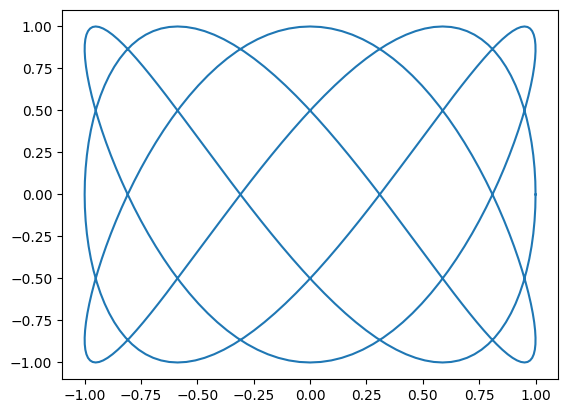

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
theta_array = np.linspace(0,2*pi, 401)
x_array = np.cos(3*theta_array)
y_array = np.sin(5*theta_array)
fig, ax = plt.subplots()
plt.plot(x_array, y_array)
# YOUR CODE HERE


In [59]:
# 3 Marks
# Do not try to delete this cell
# Run this cell for grading
_globals = globals()
question4c(_globals)

Correct value for theta_array
Correct value for x_array
Correct value for y_array
3 out of 3


3

In [60]:
# 1 Mark
_globals = globals()
question4c_plot(_globals)

Correct horizontal coordinates
Correct vertical coordinates
This seems to be a line plot
Plot correct!!


1

## Question 5

(i) Investigate expressions like
```python
np.dot(mat23, mat33)
np.dot(mat33, mat31)
np.dot(mat33, int_arr)
np.dot(int_arr, int_arr2)
```
etc. Then:

(a) The `dot` function in the NumPy module can be used to find

<ol>
    <li>the scalar product of two vectors represented as 1D arrays;</li>
    <li>the matrix product of two matrices represented as 2D arrays;</li>
    <li>both.</li>
</ol>

In [61]:
question5ia_answer = 3

In [62]:
# 1 Mark
assert(question5ia_answer == question5_ia())
print('test case passed!')

test case passed!


(b) Which of the following work; that is, don't generate an error message? 

<ol>
    <li><code>np.dot(mata, matb)</code>, where <code>mata</code> and <code>matb</code> are $3\times 3$ matrices?</li>
    <li><code>np.dot(mata, matb)</code>, where <code>mata</code> is a $3 \times 3$ matrix and <code>matb</code> is a $3 \times 1$ matrix?</li>
    <li><code>np.dot(mata, matb)</code>, where <code>mata</code> is a $3 \times 3$ matrix and <code>matb</code> is a $1 \times 3$ matrix?</li>
    <li><code>np.dot(mata, matb)</code>, where <code>mata</code> is a $1 \times 3$ matrix and <code>matb</code> is a $3 \times 3$ matrix?</li>
    <li><code>np.dot(mata, matb)</code>, where <code>mata</code> is a $3 \times 1$ matrix and <code>matb</code> is a $3 \times 3$ matrix?</li>
</ol>

Type in your answers in curly brackets separated by commas; for example, if you think 1, 3 and 5 are the correct answers, type in `{1, 3, 5}`.

In [63]:
question5ib_answer = {1,2,4}

In [64]:
# 1 Mark
assert(question5ib_answer == question5_ib())
print('test case passed!')

test case passed!


(c) Suppose `mat` is a $3 \times 3$ NumPy array and `vec` is a 1D array of length 3; numerical in each case. Then the expressions

```python
np.dot(mat, vec)
np.dot(vec, mat)
```

<ol>
    <li>both work, and generate the same output;</li>
    <li>both work, and generate different output;</li>
    <li>work in the first case, though the second generates an error message;</li>
    <li>work in the second case, though the first generates an error message;</li>
    <li>both fail, generating error messages.</li>

In [65]:
question5ic_answer = 2

In [66]:
# 1 Mark
assert(question5ic_answer == question5_ic())
print('test case passed!')

test case passed!


(d) Suppose `mat` is a $3 \times 3$ NumPy array and `vec` is a 1D array of length 3; numerical in each case. Then, in the expressions

```python
np.dot(mat, vec)
np.dot(vec, mat)
```

the 1D array `vec` is interpreted by Python

<ol>
    <li>as a row vector in both cases;</li>
    <li>as a column vector in both cases;</li>
    <li>as a row vector in the first case and a column vector in the second case;</li>
    <li>as a column vector in the first case and a row vector in the second case.</li> 
</ol>

In [67]:
question5id_answer = 4

In [68]:
# 1 Mark
assert(question5id_answer == question5_id())
print('test case passed!')

test case passed!


(ii) The matrix $A$ is defined by

$$A = \left(\begin{array}{cccc}
1&-3&2&2\\0&1&0&-1\\1&3&1&-2\\-2&0&-3&-2
\end{array}\right)$$

and the vector ${\bf v}$ by

$${\bf v} = \left(\begin{array}{c}
0\\-2\\-5\\-1
\end{array}\right).$$

(a) Set them up in Python as, respectively, a $4 \times 4$ NumPy array and a 1D NumPy array of length 4.

In [69]:
# YOUR CODE HERE
A = np.array([[1,-3,2,2],[0,1,0,-1],[1,3,1,-2],[-2,0,-3,-2]])
v = np.array([0,-2,-5,-1]).T


In [70]:
# 2 Marks
# Do not try to delete this cell
# Run this cell for grading
_globals = globals()
question5iia(_globals)

Correct value for A
Correct value for v
2 out of 2


2

Import the `linalg` submodule of the NumPy module, and using functions from it, calculate:

(b) The norm, or magnitude, of the vector ${\bf v}$, $|{\bf v}|$ (sometimes written $||{\bf v}||$). Call this `normv`.

In [71]:
import numpy.linalg as la
# YOUR CODE HERE
normv = la.norm(v)
print(normv)

5.477225575051661


In [72]:
# 1 Mark
# Do not try to delete this cell
# Run this cell for grading
_globals = globals()
question5iib(_globals)

Correct value for normv


1

(c) The 1-norm of ${\bf v}$, $||{\bf v}||_1$, equal to the sum of the absolute values of ${\bf v}$'s components. Call this `norm1v`.

In [73]:
# YOUR CODE HERE
norm1v = la.norm(v, 1)
print(norm1v)

8.0


In [74]:
# 1 Mark
# Do not try to delete this cell
# Run this cell for grading
_globals = globals()
question5iic(_globals)

Correct value for norm1v


1

(d) The $\infty$-norm of ${\bf v}$, $||{\bf v}||_\infty$, equal to the maximum absolute value of ${\bf v}$'s components. Call this `norminfv`.

In [75]:
# YOUR CODE HERE

norminfv = la.norm(v, ord=np.inf)
print(norminfv)

5.0


In [76]:
# 1 Mark
# Do not try to delete this cell
# Run this cell for grading
_globals = globals()
question5iid(_globals)

Correct value for norminfv


1

(e) The determinant of $A$. Call this `detA`.

In [77]:
# YOUR CODE HERE
detA = la.det(A)
print(detA)

2.0


In [78]:
# 1 Mark
# Do not try to delete this cell
# Run this cell for grading
_globals = globals()
question5iie(_globals)

Correct value for detA


1

(f) The inverse matrix of $A$. Call this `invA`.

In [79]:
# YOUR CODE HERE
invA = la.inv(A)
print(invA)

[[ 0.5 -9.   3.5  1.5]
 [-0.5  1.  -0.5 -0.5]
 [ 0.   6.  -2.  -1. ]
 [-0.5 -0.  -0.5 -0.5]]


In [80]:
# 1 Mark
# Do not try to delete this cell
# Run this cell for grading
_globals = globals()
question5iif(_globals)

Correct value for invA


1

(g) The eigenvalues of A. Call these `eigA`.

In [81]:
# YOUR CODE HERE
eigA = la.eigvals(A)
print(eigA)

[ 3.02385899 -2.28250615 -0.42429781  0.68294497]


In [82]:
# 1 Mark
# Do not try to delete this cell
# Run this cell for grading
_globals = globals()
question5iig(_globals)

Correct value for eigA


1

(h) The value of $A^5$, where the power indicates repeated <em>matrix</em> multiplication. (You can do this using repeated applications of `dot`, and autograding won't be able to tell if you have, but try to do it using a function from the `linalg` submodule instead.) Call this `Apow5`.

In [83]:
# YOUR CODE HERE
Apow5 = la.multi_dot([A]*5)
print(Apow5)

[[  13  -12   22   41]
 [  34   31   47  -31]
 [ 130   99  183  -75]
 [-109  -39 -161  -36]]


In [84]:
# 1 Mark
# Do not try to delete this cell
# Run this cell for grading
_globals = globals()
question5iih(_globals)

Correct value for Apow5


1

(j) (and I hope you can see why I've skipped part (i)...) The solution, ${\bf x}$, of the linear equation system

$$A\,{\bf x} = {\bf v},$$

as a 1D NumPy array. Call this `solution1`.

In [85]:
# YOUR CODE HERE
solution1 = np.dot(la.inv(A), v)
print(solution1)

[-1.  1. -1.  3.]


In [86]:
# 1 Mark
# Do not try to delete this cell
# Run this cell for grading
_globals = globals()
question5iij(_globals)

Correct value for solution1


1

(k) The column vector ${\bf w}$ is defined by

$${\bf w} = \left(\begin{array}{cccc}
1&0&1&-1
\end{array}\right).$$

Find, as a 1D NumPy array, the solution ${\bf y}$ of the linear equation system

$${\bf y} \, A = {\bf w}$$

(this may take some thought). Call this `solution2`

In [87]:
w =np.array([1,0,1,-1])
# YOUR CODE HERE
solution2 = np.dot(w, la.inv(A))
print(solution2)

[ 1. -3.  2.  1.]


In [88]:
# 1 Mark
# Do not try to delete this cell
# Run this cell for grading
_globals = globals()
question5iik(_globals)

Correct value for solution2


1

## Question 6

(a) Define a `poly1d` object called `mypoly` corresponding to the quartic 
$$x^4-8\,x^3-26\,x^2+168\,x-135.$$

In [89]:
# YOUR CODE HERE
mypoly = np.poly1d([1,-8,-26,168,-135])
print(mypoly)

   4     3      2
1 x - 8 x - 26 x + 168 x - 135


In [90]:
# 1 Mark
# Do not try to delete this cell
# Run this cell for grading
_globals = globals()
question6a(_globals)

Correct value for mypoly


1

(b) Calculate the values of `mypoly` at $x=-6,-5,-4,\dots,8,9,10$, giving your answer in the form of a NumPy array called `mypolyvalues`.

In [91]:
# YOUR CODE HERE
mypolyvalues = np.array(mypoly([range(-6, 11)]))
print(mypolyvalues)

[[ 945    0 -455 -576 -495 -320 -135    0   49    0 -135 -320 -495 -576
  -455    0  945]]


In [92]:
# 1 Mark
# Do not try to delete this cell
# Run this cell for grading
_globals = globals()
question6b(_globals)

Correct value for mypolyvalues


1

(c) Calculate the roots of `mypoly`, giving your answer in the form of a NumPy array called `mypolyroots`.

In [93]:
# YOUR CODE HERE
mypolyroots = mypoly.roots
print(mypolyroots)

[ 9. -5.  3.  1.]


In [94]:
# 1 Mark
# Do not try to delete this cell
# Run this cell for grading
_globals = globals()
question6c(_globals)

Correct value for mypolyroots


1

(d) Calculate the $x$- and $y$-coordinates of the stationary points of `mypoly`, giving your answers as NumPy arrays `spx` and `spy`.

In [95]:
# YOUR CODE HERE
der = mypoly.deriv(1)
spx = der.roots
spy = mypoly(spx)
print(spx)
print(spy)

[ 7. -3.  2.]
[-576. -576.   49.]


In [96]:
# 2 Marks
# Do not try to delete this cell
# Run this cell for grading
_globals = globals()
question6d(_globals)

Correct value for spx
Correct value for spy


2

(e) Create a plot of `mypoly` for $-6\le x \le 10$, showing the positions of the three stationary points you found above. Use exactly 200 points on the plot.

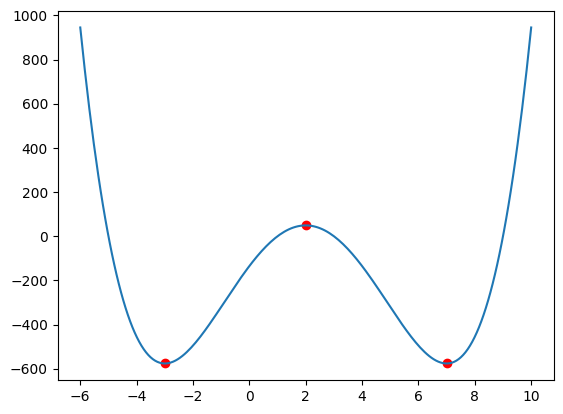

In [131]:
# YOUR CODE HERE
x = np.linspace(-6, 10, num=200)
y = mypoly(x)
_, ax = plt.subplots()
ax.plot(x,y)
ax.scatter(spx, spy, color='r')

In [98]:
# 2 Marks
_globals = globals()
question6e_plot(_globals)

Your plot seems to show both the curve and its stationary points
Correct points for the curve
Correct stationary points


2

## Bonus Question, Part 1

Write a function `root_finder`, which takes as inputs the lambda-expressions `f` and `df` (representing a function and its derivative), the left and right endpoints `a` and `b` respectively, and a tolerance `tol`. The function should implement BOTH the bisection method and Newton's method; the bisection method should use the initial interval `(a, b)`, and Newton's method should use the initial value `(a + b)/2`. 

In the case of the bisection method, iteration should continue for as long as the interval length is greater than the tolerance; in the case of Newton's method, iteration should continue for as long as the difference between successive iterates is greater than the tolerance.

Your function should return the final approximation to the root as well as the number of iterations required to achieve the approximation for each method. The returned values should be of the form: `bisection_approx, bisection_iterations, newton_approx, newton_iterations`. The bisection search should return the midpoint of the final interval.

In [134]:
def root_finder(f, g, a, b, tol):
    # YOUR CODE HERE
    return bisect(f,a,b,tol) + newton_method(f,g,(a+b)/2, tol)


def bisect(f,a,b,tol):
    iter_time = 0
    while b - a > tol:
        c = 0.5 * (a + b)
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        iter_time = iter_time + 1
    return 0.5 * (a + b), iter_time

def newton_method(f, df, x0, tol):
    xnew = x0 - (f(x0)/df(x0))
    iter_time = 1
    while abs(xnew - x0) > tol:
        x0 = xnew
        xnew = x0 - (f(x0)/df(x0))
        iter_time += 1
    return xnew, iter_time




In [135]:
# Run this test cell to check your code
# Do not delete this cell
# 1 Mark
f1     = lambda x: x**2 - 2
df1     = lambda x: 2*x
a1     = 0
b1     = 3
tol1   = 1e-7

npt.assert_almost_equal(1.4142135232686996, root_finder(f1, df1, a1, b1, tol1)[0])
print("Test case: correct estimate returned by bisection method!")

Test case: correct estimate returned by bisection method!


In [136]:
# Run this test cell to check your code
# Do not delete this cell
# 1 Mark
f1     = lambda x: x**2 - 2
df1     = lambda x: 2*x
a1     = 0
b1     = 3
tol1   = 1e-7

bisection_its = root_finder(f1, df1, a1, b1, tol1)[1]
assert(bisection_its >= 24 and bisection_its <= 26)
print("Test case: right number of iterations performed by bisection method!")

Test case: right number of iterations performed by bisection method!


In [137]:
# Run this test cell to check your code
# Do not delete this cell
# 1 Mark
f1     = lambda x: x**2 - 2
df1     = lambda x: 2*x
a1     = 0
b1     = 3
tol1   = 1e-7

npt.assert_almost_equal(1.4142135623730951, root_finder(f1, df1, a1, b1, tol1)[2])
print("Test case: correct estimate returned by Newton's method!")

Test case: correct estimate returned by Newton's method!


In [138]:
# Run this test cell to check your code
# Do not delete this cell
# 1 Mark
f1     = lambda x: x**2 - 2
df1     = lambda x: 2*x
a1     = 0
b1     = 3
tol1   = 1e-7

newton_its = root_finder(f1, df1, a1, b1, tol1)[3]
assert(newton_its >= 3 and newton_its <= 5)
print("Test case: right number of iterations performed by Newton's method!")

Test case: right number of iterations performed by Newton's method!


In [ ]:
# Run this test cell to check your code
# Do not delete this cell
# 2 Marks

## Bonus Question, Part 2

Usually, Newton's method outperforms interval bisection, but this isn't invariably the case. Investigate the convergence of both methods to the zero, between $x=0$ and $x=1$, of $f_2(x)=\sin^3(x+3)$; use $a=0$ and $b=1$, and a tolerance of $10^{-7}$.

Why exactly does Newton's method do so badly here?

Using what you've learnt, find a polynomial function $f_3$ with a zero at exactly $x=\sqrt{2}$ to which both methods converge (using $a=1$, $b=2$ and a tolerance of $10^{-7}$) but to which Newton's method converges <em>much</em> more slowly than interval bisection, taking more than twice as many iterations.

In [140]:
f3 = lambda x: (x**2-2)**5
df3 = lambda x: 10*x*(x**2-2)**4

In [141]:
a3 = 1
b3 = 2
tol3 = 1e-7

rf3 = root_finder(f3, df3, a3, b3, tol3)
assert(rf3[3] > 2*rf3[1])
print("Test passed!")

Test passed!
